In [5]:
import pandas as pd
import numpy as np

ad = pd.read_csv('actual_duration.csv')

ar = pd.read_csv('appointments_regional.csv')

nc = pd.read_excel('national_categories.xlsx')

   appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
5            2021-09  Extended Access Provision                 187906
6            2021-09           General Practice               25940821
7            2021-09                      Other                 527174
8            2021-09       Primary Care Network                 530485
10           2021-10  Extended Access Provision                 209539
11           2021-10           General Practice               27606171
12           2021-10                      Other                 556487
13           2021-10       Primary Care Network                 564981
15           2021-11  Extended Access Provision                 207577
16    

C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


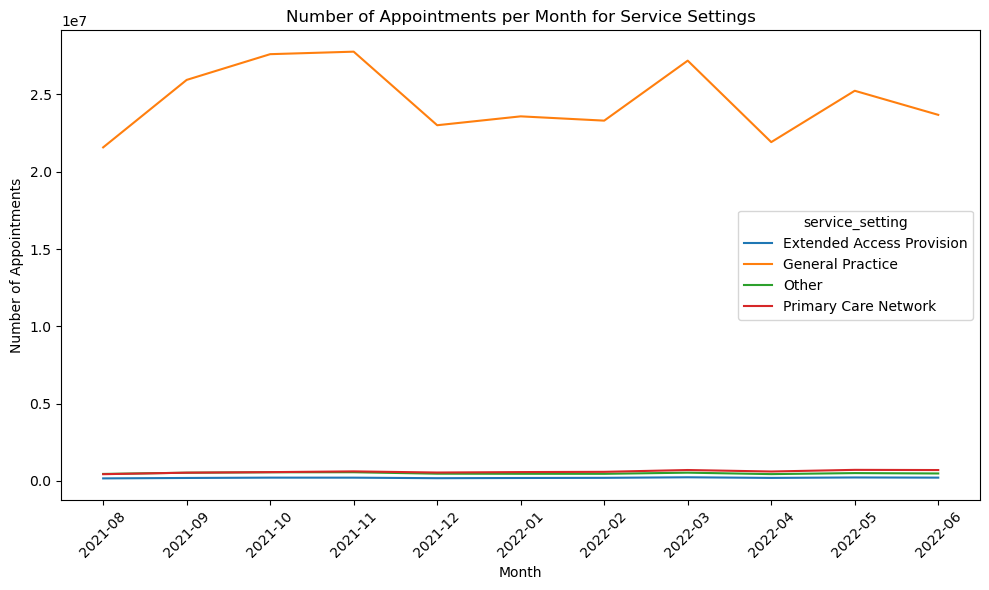

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Change the data type of appointment_month to string
nc['appointment_month'] = nc['appointment_month'].astype(str)

# Aggregate the appointments per month and service settings
nc_ss = nc.groupby(['appointment_month', 'service_setting'])['count_of_appointments'].sum().reset_index()

# Filtered out unneccessary data
nc_ss_filtered = nc_ss[(nc_ss['service_setting'] != 'Unmapped')]

# View the data
print(nc_ss_filtered)

# Create a lineplot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss_filtered, errorbar=None)
plt.title('Number of Appointments per Month for Service Settings')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   appointment_month            context_type  count_of_appointments
9            2021-11  Care Related Encounter               26282778
6            2021-10  Care Related Encounter               26125201
21           2022-03  Care Related Encounter               25928850
3            2021-09  Care Related Encounter               24404251
27           2022-05  Care Related Encounter               24101243
30           2022-06  Care Related Encounter               22621827
15           2022-01  Care Related Encounter               22441947
18           2022-02  Care Related Encounter               22211021
12           2021-12  Care Related Encounter               21798612
24           2022-04  Care Related Encounter               20904193
0            2021-08  Care Related Encounter               20255235


C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


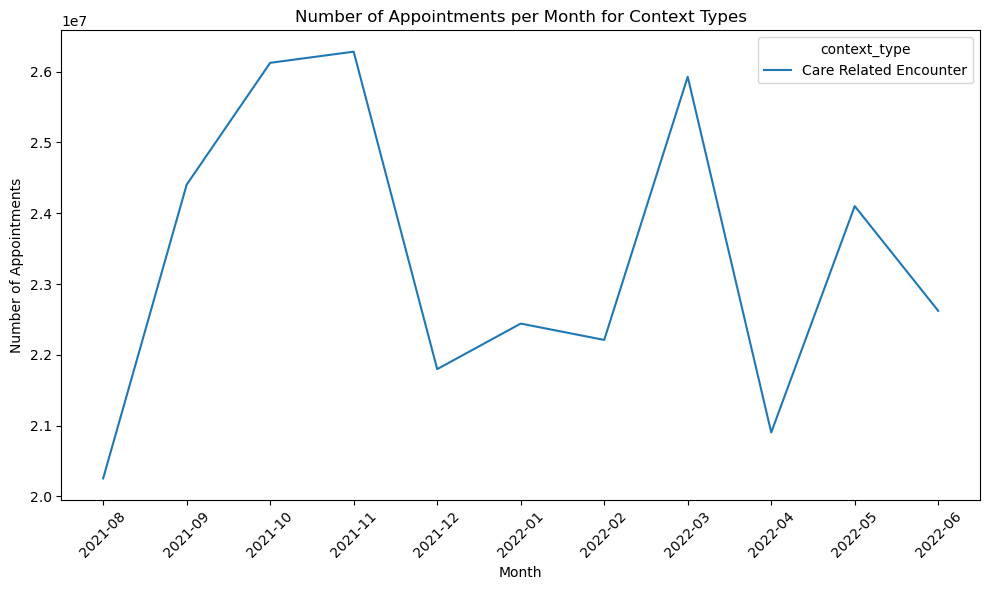

In [26]:
# Aggregate the appointments per month and context type
nc_ct = nc.groupby(['appointment_month', 'context_type'])['count_of_appointments'].sum().reset_index()

# Filter the DataFrame to exclude the 'Unmapped' and 'Inconsistent Mapping' category
nc_ct_filtered = nc_ct[(nc_ct['context_type'] != 'Unmapped') & (nc_ct['context_type'] != 'Inconsistent Mapping')]

# View the new DataFrame
print(nc_ct_filtered.sort_values(by='count_of_appointments', ascending=False))

# Create a lineplot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct_filtered, errorbar=None)
plt.title('Number of Appointments per Month for Context Types')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\todyl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


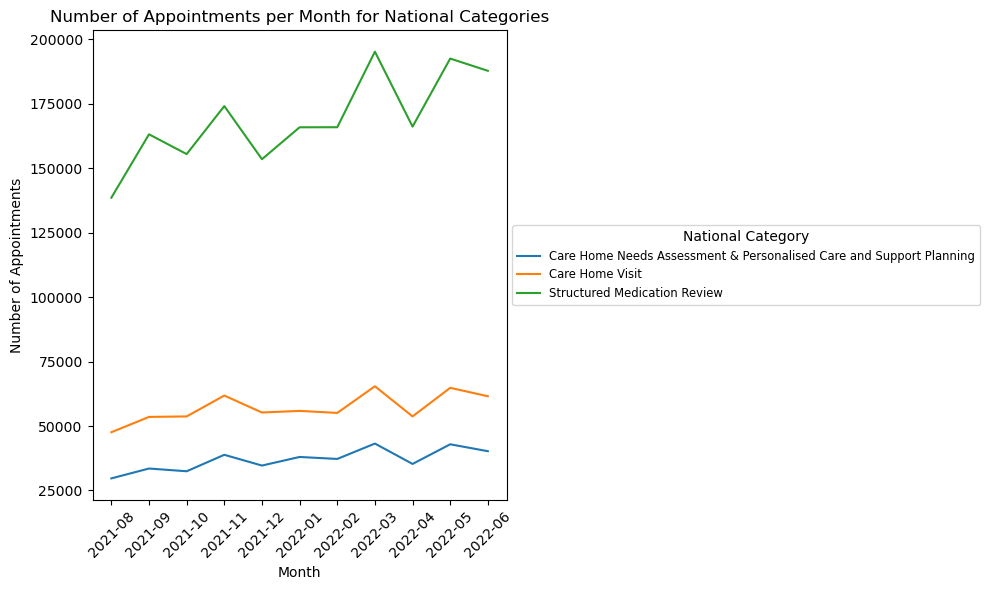

In [27]:
# Aggregate the appointments per month and national category
nc_nc = nc.groupby(['appointment_month', 'national_category'])['count_of_appointments'].sum().reset_index()

# Get the top 5 most common national categories by their appointment count
top_national_categories = nc_nc['national_category'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 categories
nc_nc_top = nc_nc[nc_nc['national_category'].isin(top_national_categories)]

# Further filter the DataFrame to exclude the 'Unmapped' category
nc_nc_top_filtered = nc_nc_top[(nc_nc_top['national_category'] != 'Unmapped') & 
                               (nc_nc_top['national_category'] != 'Unplanned Clinical Activity')]

# Create a line plot with Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc_top_filtered, errorbar=None)

# Add plot title and labels
plt.title('Number of Appointments per Month for National Categories')
plt.xlabel('Month')
plt.ylabel('Number of Appointments')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the font size of the legend and place it on the right
plt.legend(title='National Category', fontsize='small', loc='center left', bbox_to_anchor=(1, 0.5))

# Ensure the plot layout is tight to avoid clipping
plt.tight_layout()

# Show the plot
plt.show()

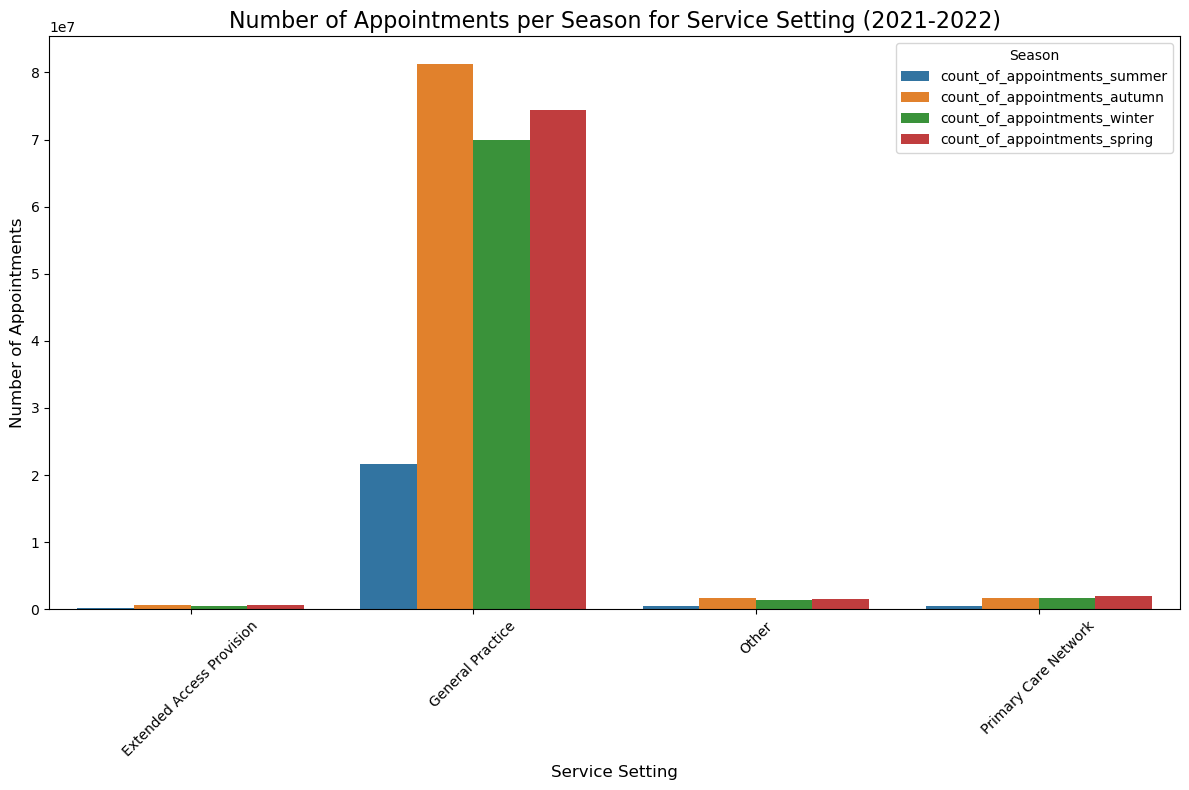

In [18]:
# Filter out 'Unmapped' service settings
nc_filtered = nc[nc['service_setting'] != 'Unmapped']

# 1. Filter the data for appointments from June to August 2021
nc_summer = nc_filtered[(nc_filtered['appointment_month'] >= '2021-06') & (nc_filtered['appointment_month'] <= '2021-08')]
nc_autumn = nc_filtered[(nc_filtered['appointment_month'] >= '2021-09') & (nc_filtered['appointment_month'] <= '2021-11')]
nc_winter = nc_filtered[(nc_filtered['appointment_month'] >= '2021-12') & (nc_filtered['appointment_month'] <= '2022-02')]
nc_spring = nc_filtered[(nc_filtered['appointment_month'] >= '2022-03') & (nc_filtered['appointment_month'] <= '2022-05')]

# 2. Aggregate the appointments per service setting
nc_summer_agg = nc_summer.groupby('service_setting')['count_of_appointments'].sum().reset_index()
nc_autumn_agg = nc_autumn.groupby('service_setting')['count_of_appointments'].sum().reset_index()
nc_winter_agg = nc_winter.groupby('service_setting')['count_of_appointments'].sum().reset_index()
nc_spring_agg = nc_spring.groupby('service_setting')['count_of_appointments'].sum().reset_index()


# Merge the aggregated data into a single DataFrame
nc_seasons = pd.merge(nc_summer_agg, nc_autumn_agg, on='service_setting', how='outer', suffixes=('_summer', '_autumn'))
nc_seasons = pd.merge(nc_seasons, nc_winter_agg, on='service_setting', how='outer')
nc_seasons = pd.merge(nc_seasons, nc_spring_agg, on='service_setting', how='outer', suffixes=('_winter', '_spring'))

# Rename the columns appropriately
nc_seasons.columns = ['service_setting', 'count_of_appointments_summer', 'count_of_appointments_autumn', 'count_of_appointments_winter', 'count_of_appointments_spring']

# Melt the DataFrame to long format for seaborn
nc_seasons_melted = pd.melt(nc_seasons, id_vars='service_setting', var_name='season', value_name='count_of_appointments')

# Create a bar plot with Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='service_setting', y='count_of_appointments', hue='season', data=nc_seasons_melted)

# Add plot title and labels
plt.title('Number of Appointments per Season for Service Setting (2021-2022)', fontsize=16)
plt.xlabel('Service Setting', fontsize=12)
plt.ylabel('Number of Appointments', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Add legend
plt.legend(title='Season', loc='upper right')

plt.show()